# Session 3: Geocoding and Nearest Neighbour Analysis
*Written by Men Vuthy, 2021*

---

#### Overview:
    
In this session, we will learn about how to geocode the list of addresses from OpenStreetMap to coordinates and how to conduct Nearest Neighbour Analysis (NNA) to find the nearest point from a collection of data points to the target. In this lesson, we go through different kinds of data manipulation and spatial analysis, especially we will learn how to write a definition function for NNA. 

After this session, you will understand how to:

* Convert location names to coordinates
* Geocode a set of addresses to coordinate data from OpenStreetMap
* Plot those addresses location in a map
* Conduct spatial queries. Ex: finding points in polygon
* Find the nearest locations or points between two sets of data.

**Downloading data**

The data used in this session is a list of random addresses in New York, The United States and available at [github](https://gist.github.com/HeroicEric/1102788). However, the original dataset seems a lot which will lengthen the process time, and also some address is not correctly written. For this reason, it is reduced and revised to a better version of address and easy to run in Python. 

Dataset: 

- addresses.txt



![alt text](img-markdown\New_York_regions_map.jpeg "Title")

### 1. Introduction to Geocoding in Geopandas

`Geocoding` is the process supported by `geopandas` to convert place names or addresses to location on Earth through [geopy](https://geopy.readthedocs.io/en/stable/). Geopy and other geocoding libraries make it easy to locate the coordinates of addresses, cities, countries, and landmarks across the glob by using web service providers. Geocoding services offered by Geopy includes:

* [ArcGIS World Geocoding Service](https://developers.arcgis.com/rest/geocode/api-reference/overview-world-geocoding-service.htm)
* [Google Geocoding API](https://developers.google.com/maps/documentation/geocoding/overview)
* [MapQuest Open APIs](https://developer.mapquest.com/documentation/open/)
* etc.

Most of available service providers may require parameters such as API keys and it is mostly not free. Therefore, the commonly-used service and often free of charge is [Open Street Map Nominatim](https://wiki.openstreetmap.org/wiki/Nominatim).

In geopandas, there's a function called `geocode()`. This fuction can geocode a list of place names or addresses(string) and return a new form of addresses and point coordinates as a GeoDataFrame.

**Geocode addresses using Nominatim service provider**

To use OSM Nominatim, one must create a username to access the service. Click 
[here](https://help.openstreetmap.org/users/)
to register an account to use Nominatim service.

*Note: Remember to provide below information when using Nominatim service*

- the name of service provider in `provider`. Ex: provider<span style="color:#ac24fc">=</span><span style="color:red">'nominatim'</span>
- name of user in `user_agent` parameters. Ex: user_agent<span style="color:#ac24fc">=</span><span style="color:red">'geopy_osm'</span>
- (optional) the time of how many seconds we will wait for getting response from the service in `timeout`. Ex: timeout<span style="color:#ac24fc">=</span><span style="color:green">4</span>

#### a. Geocoding from a name list

Now let's geocode different place name of boroughs in New York City using dataset from `geopandas` directory, and plot those locations along with the detailed borough boundary. Read more about this example at [Geocoding](https://geopandas.org/docs/user_guide/geocoding.html).

In [1]:
# Import the geocoding tool
import geopandas as gpd
from geopandas.tools import geocode

In [2]:
# Import data from geopandas directory which was already stored in your computer
new_york = gpd.read_file(gpd.datasets.get_path("nybb"))

# Read the dataframe
new_york

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [3]:
# Extract the name list from dataframe
boros = new_york.BoroName
boros

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

* With a list of borough names we created above, we can geocode these names using geopandas geocoding function called `geocode()`

In [4]:
# Geocode addresses using Nominatim. Here, I use "geopy_osm" username
geo = geocode(boros, provider='nominatim', user_agent='geopy_osm', timeout=4)

# Print out result
geo

,geometry,address
0,POINT (-74.14960 40.58346),"Staten Island, Richmond County, New York, Unit..."
1,POINT (-73.82831 40.71351),"Queens, Queens County, New York, United States"
2,POINT (-73.94972 40.65260),"Brooklyn, Kings County, New York, United States"
3,POINT (-73.95989 40.78962),"Manhattan, New York County, New York, United S..."
4,POINT (-73.87859 40.84665),"The Bronx, Bronx County, New York, United States"


As you can see, from the name of boroughs we can retrieve the geometry of each location as point objects and also addresses in a well-written format.

Now let's plot these locations on New York city map.

In [5]:
# Import plotting module
import matplotlib.pyplot as plt

Before plotting, we have to confirm that both location and area boundary has the same coordinate reference system

In [6]:
# confirm crs
new_york.crs == geo.crs

False

Okay, let's matching its coordinate system

In [7]:
# change crs
New_York = new_york.to_crs(geo.crs)

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


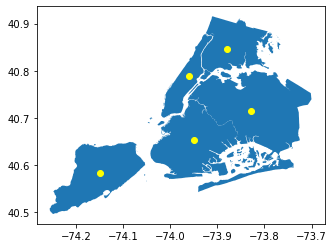

In [8]:
# Let's plot the borough locations on a map
ax = New_York.plot()
geo.plot(ax=ax, color='yellow')

plt.show();

#### b. Geocoding from address file

Here, we will geocode the addresses in New York state stored in a text file called `address_random.txt`.

The first 6 rows of data look like this:

ID; address

100; 141 Washington Ave Extension  Albany NY 12205

101; 2055 Niagara Falls Blvd  Amherst NY 14228

102; 297 Grant Avenue  Auburn NY 13021

103; 4133 Veterans Memorial Drive  Batavia NY 14020

104; 3191 County rd 10  Canandaigua NY 14424

In [9]:
# First, import necessary modules
import pandas as pd
import geopandas as gpd

We can read the data of `txt`, `csv`, or `xlsx` into a Pandas DataFrame using the `read_csv()` -function:

In [10]:
# determine file path
fp = 'data/addresses.txt'

# Read address file 
data = pd.read_csv(fp, delimiter = ';')

In [11]:
# Let's check the file
print('The total address is:',len(data))

data

The total address is: 23


,id,addr
0,100,"Walmart Supercenter, 141, Washington Avenue E..."
1,101,"2055, Niagara Falls Boulevard, Amherst, Erie ..."
2,102,"Walmart Supercenter, 297, Grant Avenue, City ..."
3,103,"Walmart Supercenter, 4133, Veterans Memorial ..."
4,104,"3191, County Road 4, Town of Canandaigua, Ont..."
5,105,"30, Broome Street, Catskill, Town of Catskill..."
6,106,"161, Centereach Mall, Suffolk County, New Yor..."
7,108,"Citi Trends, 100, East Thruway Plaza Drive, T..."
8,109,"Walmart Supercenter, 5033, Transit Road, East..."
9,110,"Runnings, 3949, State Route 31, Town of Clay,..."


In [12]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
geo_address = geocode(data.addr, provider='nominatim', user_agent='autogis_xx', timeout=4)

Great job! We now get a GeoDataFrame that contains `geometry` of Shapely Point -objects based on addresses. Surely, this dataframe can be exported to a Shapefile using the method from Session-2. However, the `id` column is missing here; hence, we need to join the information from `data` into our new dataframe `geo_address` by using *Table Join*.

#### c. Table join

In GIS analyses, table join is a procedure which combine data from different tables based on common key attribute. In Python, it can be done easily in Pandas/Geopandas using `join()`. In order to join two tables together, we need to make sure that the order and number of the records are **the same** in both DataFrame.

Now, we will use `join()` -function to merge `data` and `geo_address` together based on index (by default) as both DataFrame already have the same order and number of rows.

In [13]:
join_df = geo_address.join(data)
join_df.head()

,geometry,address,id,addr
0,POINT (-73.84703 42.69495),"Walmart Supercenter, 141, Washington Avenue Ex...",100,"Walmart Supercenter, 141, Washington Avenue E..."
1,POINT (-78.82218 43.01100),"2055, Niagara Falls Boulevard, Town of Amherst...",101,"2055, Niagara Falls Boulevard, Amherst, Erie ..."
2,POINT (-76.54815 42.95406),"Walmart Supercenter, 297, Grant Avenue, City o...",102,"Walmart Supercenter, 297, Grant Avenue, City ..."
3,POINT (-78.20803 43.01360),"Walmart Supercenter, 4133, Veterans Memorial D...",103,"Walmart Supercenter, 4133, Veterans Memorial ..."
4,POINT (-77.24682 42.90172),"3191, County Road 4, Town of Canandaigua, Onta...",104,"3191, County Road 4, Town of Canandaigua, Ont..."


* Let's check the type of `join_df` table

In [14]:
print(type(join_df))
print(join_df.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326', 'no_defs': True}


As a result, we have a new GeoDataFrame called `join_df` where we have both original columns plus a new column for `geometry`. So now, it is easy to save it as a Shapefile to our result directory.

In [15]:
# output file path
outfp = 'result/addresses.shp'

# save to Shapefile
join_df.to_file(outfp)

Finally, we have sucessfully geocoded the addresses into Points and made a Shapefile. Let's go to Shapefile and open it in QGIS.

---

**Plotting those addresses on New York State boundary**

Here, we will make a plot of those addresses on New York State boundary so as to visualize where they are located exactly on a map.

First, let's import New York State boundary into Python.

In [16]:
# Set filepath
fp = "data/NY_counties_shoreline.geojson"

# Read file using gpd.read_file()
ny_state = gpd.read_file(fp)

In [17]:
geo_address

,geometry,address
0,POINT (-73.84703 42.69495),"Walmart Supercenter, 141, Washington Avenue Ex..."
1,POINT (-78.82218 43.01100),"2055, Niagara Falls Boulevard, Town of Amherst..."
2,POINT (-76.54815 42.95406),"Walmart Supercenter, 297, Grant Avenue, City o..."
3,POINT (-78.20803 43.01360),"Walmart Supercenter, 4133, Veterans Memorial D..."
4,POINT (-77.24682 42.90172),"3191, County Road 4, Town of Canandaigua, Onta..."
5,POINT (-73.87106 42.21629),"30, Broome Street, Catskill, Town of Catskill,..."
6,POINT (-73.08255 40.85993),"161, Centereach Mall, Suffolk County, New York..."
7,POINT (-78.77824 42.90475),"Citi Trends, 100, East Thruway Plaza Drive, Th..."
8,POINT (-78.69387 42.98329),"Walmart Supercenter, 5033, Transit Road, Easte..."
9,POINT (-76.24021 43.18815),"Runnings, 3949, State Route 31, Town of Clay, ..."


In [18]:
# Matching the coordinate system of the boundary and addresses
NY_state = ny_state.to_crs(geo_address.crs)

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


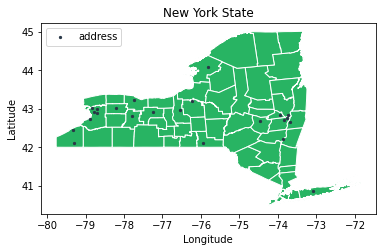

In [19]:
# Let's plot the locations on a map
ax = NY_state.plot(facecolor='#28B463', edgecolor='white')
geo_address.plot(ax=ax, color='#283747', markersize = 5, label = 'address')

# Customize the plot
plt.title('New York State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc=2) # 2 is for 'upper left'
plt.savefig('result/addresses in New York.png', dpi = 150)

plt.show();

---

#### d. Point in Polygon

**How can we check if point is inside or outside a polygon?**

Finding out if a certain point is located inside or outside of an area is a basic geospatial operations (e.g to select data based on location). As in our case, we want to select all data points or addresses in the West zone of New York state. 

There are two basic ways of conducting Point in Polygon using Shapely:
1. use `.within()`, a function for checking if a point is within a polygon
2. use `.contains()`, a fuction for checking if a polygon contains a point

Read more about other operation functions such as intersect, touches, etc in [Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html).

**Spatial query**

Fundamentally, spatial queries are typical first step of workflow in spatial analysis. Let's start by extract the West zone of New York State boundary that we imported earlier.

In [20]:
# Recall New York state boundary
NY_state.head()

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,0,None,None,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"MULTIPOLYGON (((-73.67694 42.78341, -73.67728 ..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,0,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"MULTIPOLYGON (((-78.04115 42.52082, -78.04115 ..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,0,None,None,Y,42.313958,2019-10-04,110631.250768,1.095926e+08,"MULTIPOLYGON (((-73.89688 40.79617, -73.89757 ..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,0,None,None,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"MULTIPOLYGON (((-75.41849 42.19502, -75.41858 ..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,0,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"MULTIPOLYGON (((-78.46390 42.53635, -78.46388 ..."


From the geodataframe, there are several columns, in which the column `['NYSP_ZONE']` contains information about the zone class that each county is categorized. Thus, from this column, we will select all counties that belongs to `West` zone. 

The query for `West` zone can be done as follows:

In [21]:
# Spatial query
west_ny = NY_state.loc[NY_state['NYSP_ZONE'] == 'West']

# Reset the index after query
west_ny.reset_index(drop=True, inplace=True)

west_ny.head()

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,0,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09,"MULTIPOLYGON (((-78.04115 42.52082, -78.04115 ..."
1,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,0,None,None,N,1324.309219,2019-04-26,276084.505560,3.429945e+09,"MULTIPOLYGON (((-78.46390 42.53635, -78.46388 ..."
2,Chautauqua,CHAU,974105,36013,060000,West,141895,139750,134905,0,None,None,N,1087.279177,2019-04-26,231568.884528,2.816040e+09,"MULTIPOLYGON (((-79.06072 42.53784, -79.06071 ..."
3,Erie,ERIE,974113,36029,140000,West,968532,950265,919040,0,None,None,N,1048.159552,2017-10-30,366827.189729,2.714721e+09,"MULTIPOLYGON (((-78.90772 42.93463, -78.90302 ..."
4,Genesee,GENE,974117,36037,180000,West,60060,60370,60079,0,None,None,N,496.057048,2018-02-12,155397.082626,1.284782e+09,"MULTIPOLYGON (((-77.99726 43.13297, -77.99695 ..."


* Let’s create a map which shows the location of the selected zone and the address points on top of the map:

<font size="1">*Read more about how to plot with legend: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html*</font>

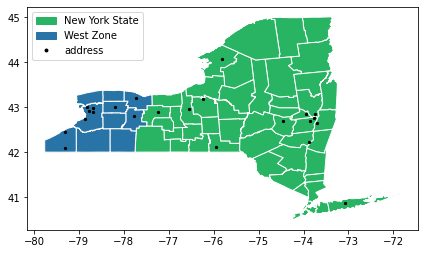

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot boundary
NY_state.plot(ax=ax, facecolor='#28B463', edgecolor = 'white')
west_ny['geometry'].plot(ax=ax, facecolor='#2874A6', edgecolor = 'white')

# Plot address points
geo_address.plot(ax=ax, color='black', markersize=5)

# Add legend
plt.legend(loc=2, handles=[Patch(color='#28B463', label='New York State'), 
                             Patch(color='#2874A6', label='West Zone'),
                             Line2D([0], [0], marker='o', color='w', label='address',
                          markerfacecolor='black', markersize=5)])
plt.tight_layout()

Clearly, there are certain points within the blue Polygon. Let's conduct further query to get those points out by using `within()`.

But, first `within()` only works with one polygon -object. It is not possible to use many polygons for query. Since, in the West zone there are many polygons of county, we should dissolve all polygons into one polygon. It can be done by using function `dissolve()` from geopandas based on common ID or name.

Read more about  [dissolve()](https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html)

**Dissolve polygons**

Let's see how we can dissolve those polygons into one:

<AxesSubplot:>

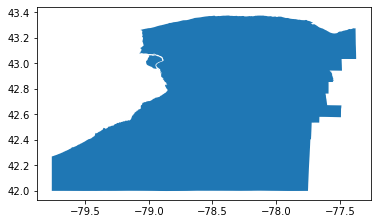

In [23]:
# dissolve polygon based on zone
polygon = west_ny.dissolve(by='NYSP_ZONE')
polygon.plot()

In [24]:
polygon

,geometry,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area
NYSP_ZONE,,,,,,,,,,,,,,,,,
West,"MULTIPOLYGON (((-78.90772 42.93463, -78.90302 ...",Allegany,ALLE,974100,36003,020000,50470,49927,48946,0,None,None,N,1035.209131,2019-04-26,210499.339279,2.681179e+09


**Conduct point in polygon**

Now let's conduct query:

* *If there are too many points for query, we should enable shapely.speedups to make some queries running faster.*

In [25]:
import shapely.speedups
shapely.speedups.enable()

* Here, we use the `.loc['West', 'geometry']` to parse the actualy Polygon geometry object from the `polygon` GeoDataFrame.

In [26]:
query = geo_address.within(polygon.loc['West', 'geometry'])
print(query)

0     False
1      True
2     False
3      True
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13     True
14     True
15    False
16     True
17    False
18     True
19    False
20     True
21     True
22    False
dtype: bool


As a result, we get an array of *boolean values* for each rows. From this array, `True` means Point is inside the Polygon, while `False` means it was not.

From this query array, we can select points of address that are inside the West zone polygon by using `.loc[]`-function of Pandas.

In [27]:
# let's extract points in polygon (pip)
pip_data = geo_address.loc[query==True]
pip_data

,geometry,address
1,POINT (-78.82218 43.01100),"2055, Niagara Falls Boulevard, Town of Amherst..."
3,POINT (-78.20803 43.01360),"Walmart Supercenter, 4133, Veterans Memorial D..."
7,POINT (-78.77824 42.90475),"Citi Trends, 100, East Thruway Plaza Drive, Th..."
8,POINT (-78.69387 42.98329),"Walmart Supercenter, 5033, Transit Road, Easte..."
13,POINT (-79.31335 42.45387),"Walmart Supercenter, 10401, Bennett Road, Fred..."
14,POINT (-77.78476 42.79901),"4300, Lakeville Road, Village of Geneseo, Town..."
16,POINT (-77.73073 43.21536),"100, Elm Ridge Center Drive, Elm Ridge Center,..."
18,POINT (-78.87170 42.74320),"Walmart Supercenter, 5360, Southwestern Boulev..."
20,POINT (-79.29999 42.09681),"Walmart Supercenter, 350, East Fairmount Avenu..."
21,POINT (-78.69682 42.88252),"4975, Transit Road, Town of Lancaster, Erie Co..."


Finally, we can get the result of all points inside the West zone of New York state.

In [28]:
# Let's also select the points outside the polygon (pop)
pop_data = geo_address.loc[query==False]

**Plotting result**

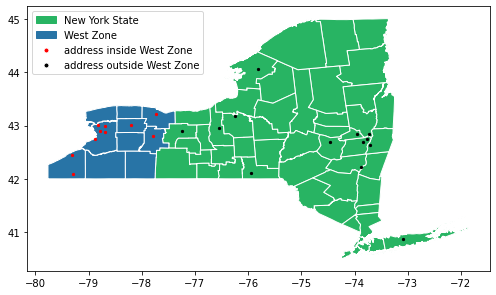

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(7,8))

# Plot boundary
NY_state.plot(ax=ax, facecolor='#28B463', edgecolor = 'white')
west_ny['geometry'].plot(ax=ax, facecolor='#2874A6', edgecolor = 'white')

# Plot address points
pip_data.plot(ax=ax, color='red', markersize=5)
pop_data.plot(ax=ax, color='black', markersize=5)

# Add legend
plt.legend(loc=2, handles=[Patch(color='#28B463', label='New York State'), 
                        Patch(color='#2874A6', label='West Zone'),
                        Line2D([0], [0], marker='o', color='w', label='address inside West Zone',
                          markerfacecolor='red', markersize=5),
                        Line2D([0], [0], marker='o', color='w', label='address outside West Zone',
                          markerfacecolor='black', markersize=5)])
plt.tight_layout()

Perfect! Now we have a perfect plot showing the addresses inside <span style="color:red">(red)</span> and outside the West zone (black), which is exactly what we wanted! 

---

#### 2. Nearest Neighbour Analysis

Nearest neighbour is a spatial analysis of finding the geometric objects and its distance that are closest to the origin object. In reality, there might be thousands of supermarkets in your country, and you want to know which of the markets are close to your city or house. Let's say, you are looking for 100 supermarkets that are closest to a city you are living in. This is a typical nearest neighbour analysis, where the aim is to find the closest geometry to another geometry.

The picture below shows you the locations of [supermarkets in the UK](https://datashare.ed.ac.uk/handle/10283/2413?show=full). There are approximately 2500 supermarkets, and what we want to know is "*Which of supermarkets are closest from the centroid of each [NUTS region](https://en.wikipedia.org/wiki/NUTS_statistical_regions_of_the_United_Kingdom)?*"


So, let's go on and find out how:

<!-- <img src="img-markdown\supermarket-UK.jpg" width=50%/> -->
![alt text](img-markdown/supermarket-UK.jpg "Title")

To conduct nearest neighbour analysis in Python, we will use a shapely fuction called [nearest_point()](https://shapely.readthedocs.io/en/latest/manual.html#nearest-points). This fuction will return a tuple of the nearest points in the input geometries and also in the same order as the input geometries.

#### a. Nearest point with Shapely

By using `nearest_point()` -function, let's find the nearest destination from a group of destination point to the origin point. 

In [30]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

origin = Point(1.5, 1.3)
dest1, dest2, dest3 = Point(1, 2), Point(0.5, 1), Point(3, 0.542)

To be able to find out the closest destination point from the origin, we need to create a MultiPoint object from the destination points.

In [31]:
destinations = MultiPoint([dest1, dest2, dest3])
print(destinations)

MULTIPOINT (1 2, 0.5 1, 3 0.542)


So now we can see that all the destination points are represented as a single MultiPoint object. Let's apply `nearest_point()` to find the nearest destination.

In [32]:
nearest_geoms = nearest_points(origin, destinations)

# Set the origin point
near_pt_1 = nearest_geoms[0]

# Set the nearest point
near_pt_2 = nearest_geoms[1]

print(nearest_geoms)
print(near_pt_1)
print(near_pt_2)

(<shapely.geometry.point.Point object at 0x000001E5F9908388>, <shapely.geometry.point.Point object at 0x000001E5F99080C8>)
POINT (1.5 1.3)
POINT (1 2)


This is the basic of how to apply `nearest_point()` to calculate the nearest point in a pair of geometries (origin and destination). As you can see, it returns a shapely point with tuples where the first point is our origin point, and second point is the nearest point that we have found. Even though, we can get a good result here, but it is not useful enough for practical work. Therefore, the next section, we will learn how to make it more practical.

#### b. Nearest point with Geopandas

In this section, we learn how to find the nearest points from a set of origin points to a set of destination points using GeoDataFrames. Let's go back to our question: we want to find the nearest supermarkets to the centroid of each NUTS region. Thus, we will use the NUTS boundary data from the [Office for National Statistics of UK](https://geoportal.statistics.gov.uk/datasets/ons::nuts-level-1-january-2018-full-clipped-boundaries-in-the-united-kingdom/about) and point locations of all [supermarkets in United Kingdom](https://datashare.ed.ac.uk/handle/10283/2413?show=full).

**Dataset:**

1. NUTS boundary: `data/NUTS_level_1_(Jan_2018)_boundaries.shp`
2. Location of supermarket: `data/Location_of_supermarket_in_Britain.shp`

In [33]:
import geopandas as gpd
from shapely.ops import nearest_points

In [34]:
# Filepath of NUTS boundary
fp1 = 'data/NUTS_level_1_(Jan_2018)_boundaries.shp'
fp2 = 'data/Location_of_supermarket_in_Britain.shp'

# Read dataframe
df1 = gpd.read_file(fp1)
df2 = gpd.read_file(fp2)

In [35]:
# Check dataframe of boundary
df1.head()

,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
1,2,UKD,North West (England),350015,506280,-2.77237,54.449451,1.416409e+10,2.075324e+06,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
2,3,UKE,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,1.540912e+10,1.385386e+06,"MULTIPOLYGON (((478300.699 518863.096, 478309...."
3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06,"MULTIPOLYGON (((512572.598 414469.499, 512619...."
4,5,UKG,West Midlands (England),386294,295477,-2.20358,52.556969,1.300374e+10,9.539014e+05,"POLYGON ((402840.498 368845.598, 402862.397 36..."


In [36]:
# Create centroid of each NUTS region
df1['centroid'] = df1.centroid
df1.head(2)

,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,centroid
0,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((398583.804 653093.703, 398566....",POINT (406274.318 569213.337)
1,2,UKD,North West (England),350015,506280,-2.77237,54.449451,1.416409e+10,2.075324e+06,"MULTIPOLYGON (((357067.497 586765.599, 357029....",POINT (353041.284 461726.493)


In [37]:
# Check dataframe of supermarket
df2

,SID,LON,LAT,NAME,SUPERMARKE,geometry
0,1.0,-3.18056,55.93667,EDINBURGH CAUSEWAYSIDE EXPRESS,Tesco,POINT (326258.542 672064.843)
1,2.0,-3.18358,55.94493,EDINBURGH METRO,Tesco,POINT (326085.646 672987.227)
2,3.0,-3.20518,55.94444,EDINBURGH EARL GREY STREET EXPRESS,Tesco,POINT (324735.853 672956.000)
3,4.0,-3.21140,55.93440,EDINBURGH BRUNTSFIELD METRO,Tesco,POINT (324327.860 671845.556)
4,5.0,-3.18014,55.96144,EDINBURGH LEITH WALK EXPRESS,Tesco,POINT (326331.821 674820.767)
...,...,...,...,...,...,...
2592,2593.0,-5.06851,50.26167,Sainsbury's Truro,Sainsburys,POINT (181321.563 44685.173)
2593,2594.0,-3.18850,55.65400,Sainsbury's Peebles,Sainsburys,POINT (325222.928 640618.997)
2594,2595.0,-3.19300,55.65700,Tesco's Peebles,Tesco,POINT (324945.555 640957.675)
2595,2596.0,-4.61500,55.48700,Sainsbury's Ayr,Sainsburys,POINT (234788.209 624502.248)


So far, we have imported the data of boundary and supermarket locations as dataframes. As you can see, there are 2,597 supermarkets in UK. However, we don't know which ones are the nearest supermarkets to the centroid of each NUTS region. To get more understanding about location data, let's visualize them in a plot by using `matplotlib`.

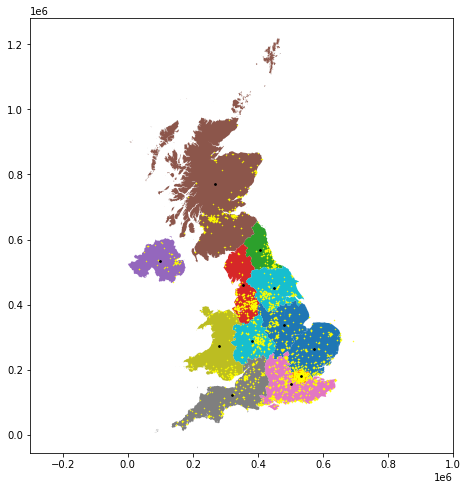

In [38]:
# import matplotlib module
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, ax = plt.subplots(figsize=(8, 8))

# Data to plot
df1.plot(ax=ax, column='nuts118nm') # nuts boundary
df2.plot(ax=ax, markersize=0.2, color='yellow') # location of supermarkets
df1.centroid.plot(ax=ax, color= 'black', markersize=3) # centroid of nuts boundary

# set plotting frame
plt.xlim(-300000, 1000000)
plt.show();

Now we can see where those supermarkets located in the map. Thus, let's start finding the nearest supermarkets step by step.

<class 'shapely.geometry.multipoint.MultiPoint'>


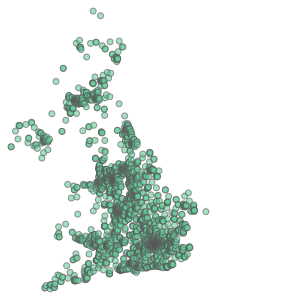

In [39]:
# Create a union polygon (make all polygons into one)
df2_union = df2['geometry'].unary_union

print(type(df2_union))
df2_union

In [40]:
# Find the nearest supermarket to the North East nuts region.
nearest = nearest_points(df1['centroid'][0], df2_union)[1]

In [41]:
# Get the information row of the nearest supermarket
row_df2 = df2[df2['geometry'] == nearest]
row_df2

,SID,LON,LAT,NAME,SUPERMARKE,geometry
2596,2597.0,-1.739,55.05,Sainsbury's Ponteland,Sainsburys,POINT (416673.661 572798.737)


**Write a loop to calculate nearest point**

In [42]:
# Create an empty pandas dataframe
nearest_pt = pd.DataFrame()

for i in range(len(df1)):
    
    # Find the nearest supermarket to the North East nuts region.
    nearest = nearest_points(df1['centroid'][i], df2_union)[1]
    
    # Get the information row of the nearest supermarket
    row_df2 = df2[df2['geometry'] == nearest]
    
    # Write each result in pandas dataframe
    nearest_pt = nearest_pt.append(row_df2)
    
nearest_pt

,SID,LON,LAT,NAME,SUPERMARKE,geometry
2596,2597.0,-1.73900,55.05000,Sainsbury's Ponteland,Sainsburys,POINT (416673.661 572798.737)
2103,2104.0,-2.82195,54.05636,Lancaster,Asda,POINT (346199.257 462525.885)
1713,1714.0,-1.12682,53.95412,Morrisons - Acomb - Font Street - Acomb - No...,Morrisons,POINT (457294.177 451192.090)
531,532.0,-0.66635,52.91421,GRANTHAM EXPRESS,Tesco,POINT (489669.615 335991.122)
592,593.0,-2.23261,52.42122,COOKLEY EXPRESS,Tesco,POINT (384182.799 280350.450)
766,767.0,0.39757,52.26007,NEWMARKET,Tesco,POINT (563613.794 265109.619)
1204,1205.0,-0.09999,51.49448,ELEPHANT AND CASTLE METRO,Tesco,POINT (531884.737 178970.946)
1967,1968.0,-0.56702,51.31692,Morrisons - Woking - 82 Goldsworth Road - Wok...,Morrisons,POINT (499854.725 158489.166)
1334,1335.0,-3.12131,51.00524,TAUNTON GALMINGTON EXPRESS,Tesco,POINT (321334.410 123454.491)
1850,1851.0,-4.06733,52.40563,Morrisons - Aberystwyth - Parc Y Dolai - Llan...,Morrisons,POINT (259382.146 280601.507)


**Write a function to calculate nearest point**

In [43]:
# Definie a function to find nearest points and return the output from spcified column
def gpd_nearest(row, target, origin_geo='geometry', output_column=None):
    
    # Create a destination geometry by making union polygon 
    destination_geo = target['geometry'].unary_union
    
    # Find the geometry that is closest
    nearest = nearest_points(row[origin_geo], destination_geo)[1]
    
    # Get the row corresponding to the nearest destination
    row_target = target[target['geometry'] == nearest]
    
    # Get the value from destination based on provided column name
    output = row_target[output_column].values

    return output

In [44]:
# Apply function to the dataframe
df1["nearest_loc"] = df1.apply(gpd_nearest, target=df2, origin_geo="centroid", output_column= "SID", axis=1)

df1.head()

,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,centroid,nearest_loc
0,1,UKC,North East (England),417313,600358,-1.72890,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((398583.804 653093.703, 398566....",POINT (406274.318 569213.337),[2597.0]
1,2,UKD,North West (England),350015,506280,-2.77237,54.449451,1.416409e+10,2.075324e+06,"MULTIPOLYGON (((357067.497 586765.599, 357029....",POINT (353041.284 461726.493),[2104.0]
2,3,UKE,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,1.540912e+10,1.385386e+06,"MULTIPOLYGON (((478300.699 518863.096, 478309....",POINT (450735.172 452358.014),[1714.0]
3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06,"MULTIPOLYGON (((512572.598 414469.499, 512619....",POINT (480316.348 337075.435),[532.0]
4,5,UKG,West Midlands (England),386294,295477,-2.20358,52.556969,1.300374e+10,9.539014e+05,"POLYGON ((402840.498 368845.598, 402862.397 36...",POINT (381687.482 286831.267),[593.0]


Très bon! By using few different methods, we can finally find the nearest supermarkets to the centroid of each NUTS region in the UK.

---